In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("netflix_titles_nov_2019.csv")

In [4]:
dataset.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [5]:
def data_details(df):
    
    print("The total movies and shows is :", df.shape[0])
    print("Total numbers of variables is: ", df.shape[1])
    
    print("----------"*10)
    
    print("The dataset columns are listed below: ")
    print(df.columns)
    
    print("----------"*10)
    
    print("The data type of each columns are: ")
    print(df.dtypes)
    
    print("----------"*10)
    print("The Missing rows in each columns are: \n")
    missing_number = df.isnull().sum()
    print(missing_number[missing_number > 0])
    
data_details(dataset)

The total movies and shows is : 5837
Total numbers of variables is:  12
----------------------------------------------------------------------------------------------------
The dataset columns are listed below: 
Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')
----------------------------------------------------------------------------------------------------
The data type of each columns are: 
show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object
----------------------------------------------------------------------------------------------------
The Missing rows in each columns are: 

director      1901
cast           556

## Data Cleaning Process

In [6]:
duplicated_data = dataset.duplicated(["title", "country", "type", "release_year"])
dataset[duplicated_data]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [7]:
# Drop the id columns
dataset = dataset.drop("show_id", axis="columns")   # You can sue axis = 1 also.


In [8]:
# Create a new column for the numbers of cast in each row
dataset["cast"] = dataset["cast"].replace(np.nan, "unknown")

def cast_count(cast):
    if cast == "unknown":
        return 0
    else:
        names = cast.split()
        number_of_cast = len(names)
        return number_of_cast

dataset["number_of_cast"] = dataset["cast"].apply(cast_count)
dataset["cast"] = dataset["cast"].replace("unknown", np.nan)

In [9]:
dataset = dataset.reset_index()

In [10]:
# Replacing the rating column with the mode because the data type is non numerical

dataset["rating"] = dataset["rating"].fillna(dataset["rating"].mode()[0])

In [11]:
# Replacing the missing values in the date_added column with january andthe mode of the release year.
dataset["date_added"] = dataset["date_added"].fillna('january 1 , {}'.format(dataset["release_year"].mode()[0]))   

In [12]:
for i,j in zip(dataset['country'].values,dataset.index):
    if i==np.nan:
        if ('Anime' in dataset.loc[j,'listed_in']) or ('anime' in dataset.loc[j,'listed_in']):
                dataset.loc[j,'country']='Japan'
        else:
            continue
    else:
        continue

In [13]:
# Converting the date time type from object to datetime.
dataset['date_added'] = pd.to_datetime(dataset["date_added"])

In [14]:
##  Exploratory Data Analysis

In [15]:
dataset["rating"].unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17'], dtype=object)


we know that NR and UR are the same. so we need to fix this in the dataset.
we need to make all rows with UR as NR.

In [16]:
def no_rating(rating):
    if rating == "UR":
        rating = "NR"
    return rating

dataset["rating"] = dataset["rating"].apply(no_rating)

In [17]:
dataset["rating"].unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'NC-17'], dtype=object)

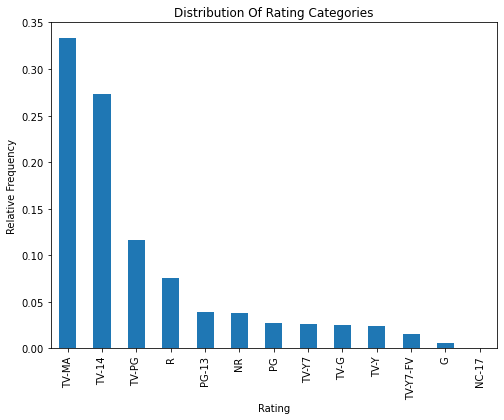

In [19]:
plt.figure(figsize = (8, 6))
dataset["rating"].value_counts(normalize= True).plot.bar()
plt.title("Distribution Of Rating Categories")
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")
plt.show()

from the above graph of rating we can see that the highest occurence is TV-MA , followed by TV-14